<a href="https://colab.research.google.com/github/jtrobec/mids-w241-fa2020-fp/blob/main/comparingAppleToApple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 

#to import pictures as numpy
import PIL
from PIL import Image
from matplotlib import pyplot


In [2]:
def CropFrame(frame):
    # Define the region of interest, those values are obtained with a trial and error approach
    top_left = [frame.shape[1] / 2 - frame.shape[1] / 20, frame.shape[0] / 2 + frame.shape[0] / 6]
    top_right = [frame.shape[1] / 2 + frame.shape[1] / 20, frame.shape[0] / 2 + frame.shape[0] / 6]
    lower_left = [frame.shape[1] / 4, frame.shape[0]]
    lower_right = [frame.shape[1] - frame.shape[1] / 4, frame.shape[0]]

    vertices = [np.array([lower_left, top_left, top_right, lower_right], dtype=np.int32)]

    # Define a matrix of zeros that matches the frame height/width
    mask = np.zeros_like(frame)

    # Retrieve the number of color channels of the frame
    if len(frame.shape) > 2:
        channel_count = frame.shape[2]
        # Create a match color with the same color channel counts
        match_mask_color = (255,) * channel_count
    else:
        match_mask_color = 255

    # Fill the blank matrix with pixels only in the area that match
    cv2.fillPoly(mask, vertices, match_mask_color)

    # Returning the frame only where mask pixels match to cut out the unnecessary region
    frame = cv2.bitwise_and(frame, mask)

    return frame

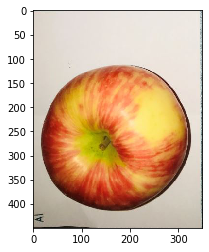

In [3]:
#op is where original picture is located at
path = r"data/B/experiment1/pic/t1/a1t1.JPG"
   
# Reading an image in default mode 
src = cv2.imread(path) 

a0 = Image.open(path)
## display the image
pyplot.imshow(a0)

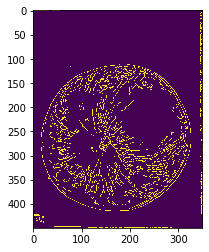

In [4]:
# Transform current frame into grayscale
grayscale = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
# Apply Canny Edge Detection to current frame the two value are detection thresholds
canny = cv2.Canny(grayscale, 50, 80)

## display the image
pyplot.imshow(canny)

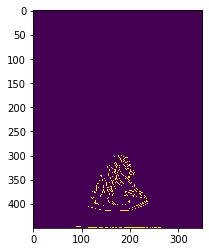

In [5]:
# Crop the frame, it returns the frame containing only the region of interest
# CropFram parameters need to be adjusted
canny = CropFrame(canny)
## display the image
pyplot.imshow(canny)

## Second method

- Works fine on some of the apples, but not all
- try `a1t1` and `b4t1`
- [source](https://github.com/imneonizer/Find-and-crop-objects-From-images-using-OpenCV-and-Python/blob/master/crop_objects.py)

JPEG
(350, 450)
RGB


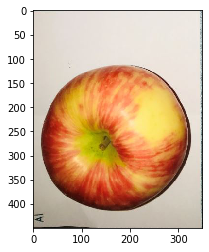

In [57]:
#op is where original picture is located at
OP = "data/B/experiment1/pic/t1/"

#cp is where cropped picture will be saved
CP = OP + "cp/"

#the reference image
rp = OP + "a1t1.JPG"

a0 = Image.open(rp)
print(a0.format) #it is jpeg
print(a0.size) #size of image
print(a0.mode) #it is RGB
## display the image
pyplot.imshow(a0)

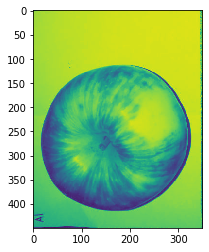

In [59]:
image = cv2.imread(rp)
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

pyplot.imshow(gray)

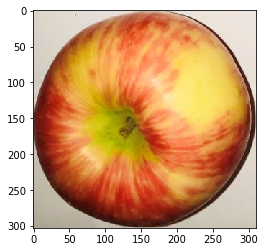

In [60]:
edged = cv2.Canny(image, 0, 250) 
(cnts, _) = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) 

idx = 0
for c in cnts: 
    x,y,w,h = cv2.boundingRect(c) 
    if w>50 and h>50: 
        idx+=1 
        new_img=image[y:y+h,x:x+w] 
        cv2.imwrite(str(idx) + '.png', new_img)

a0CROP = Image.open('1.png')
pyplot.imshow(a0CROP) 

# Third method

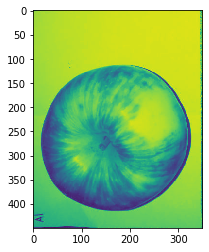

In [45]:
# Load image, convert to grayscale, and find edges
img = cv2.imread('data/B/experiment1/pic/t1/a1t1.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU + cv2.THRESH_BINARY)[1]
pyplot.imshow(gray) 

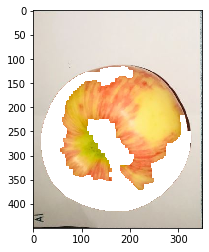

In [48]:
# threshold input image using otsu thresholding as mask and refine with morphology
ret, mask = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU) 
kernel = np.ones((9,9), np.uint8)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

# put thresh into 
result = img.copy()
result = cv2.cvtColor(result, cv2.COLOR_BGR2BGRA)
result[:, :, 3] = mask

# save resulting masked image
cv2.imwrite('img.png', result)
a0CROP = Image.open('img.png')
pyplot.imshow(a0CROP)

# Method 4

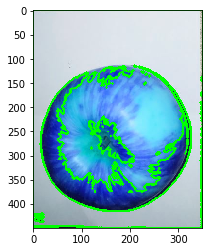

In [72]:
im = cv2.imread('data/B/experiment1/pic/t1/a1t1.jpg') # Read in your image
imgray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(imgray, 127, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cimg = cv2.drawContours(img, contours, -1, (0,255,0), 3)
pyplot.imshow(cimg)

In [15]:

# contours, _ = cv2.findContours(...) # Your call to find the contours using OpenCV 2.4.x
_, contours, _ = cv2.findContours(...) # Your call to find the contours
idx = ... # The index of the contour that surrounds your object
mask = np.zeros_like(img) # Create mask where white is what we want, black otherwise
cv2.drawContours(mask, contours, idx, 255, -1) # Draw filled contour in mask
out = np.zeros_like(img) # Extract out the object and place into output image
out[mask == 255] = img[mask == 255]

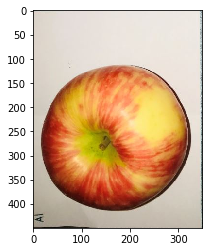

In [24]:
# Find bounding box and extract ROI
for c in cnts:
    x,y,w,h = cv2.boundingRect(c)
    ROI = image[y:y+h, x:x+w]
    break

cv2.imwrite('1.png',ROI)

a0CROP = Image.open('1.png')
pyplot.imshow(a0CROP) 

In [ ]:
cv2.imwrite('ROI.png',ROI)
cv2.waitKey()

## Convert the picutre into matrix with 256 by 256

In [6]:
#converting jepg to matrix with integers
ma0 = np.array(a0CROP.convert('L').resize((256,256)))
print(ma0.shape)
#now it is
ma0

(256, 256)


array([[199, 198, 198, ..., 161, 162, 162],
       [199, 199, 198, ..., 161, 162, 162],
       [201, 199, 199, ..., 163, 162, 163],
       ...,
       [231, 231, 231, ..., 210, 210, 209],
       [231, 231, 231, ..., 209, 210, 210],
       [231, 231, 231, ..., 209, 210, 210]], dtype=uint8)

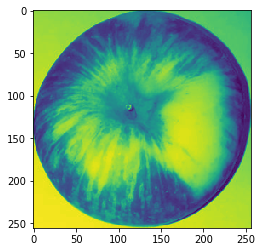

In [7]:
pyplot.imshow(ma0)

## Get other pictures

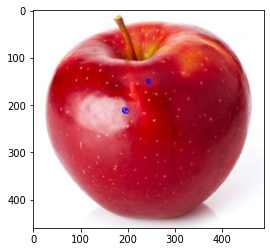

In [8]:
pyplot.imshow(Image.open('images/apple1.JPG'))

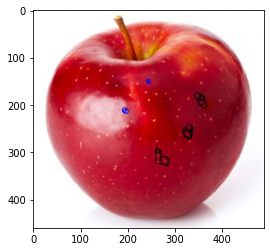

In [9]:
pyplot.imshow(Image.open('images/apple2.JPG'))

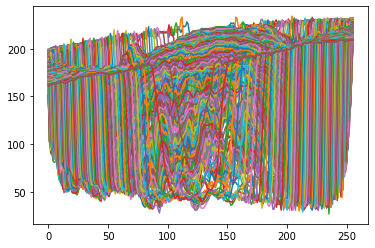

In [16]:
plt.plot(ma0)

In [11]:
#the future apple condition
ma1 = np.array(Image.open('images/apple1.JPG').convert('L').resize((256,256)))
ma2 = np.array(Image.open('images/apple2.JPG').convert('L').resize((256,256)))

In [22]:
#flatten to vector
m0 = ma0.flatten()
m1 = ma1.flatten()
m2 = ma2.flatten()

#
m0 = m0.astype(int)
m1 = m1.astype(int)
m2 = m2.astype(int)

# Vector projection

In [23]:
#our vector
m0.shape

(65536,)

In [20]:
m0 = m0.astype(int)

In [24]:
#they all should produce the same value, but they are not
print(np.linalg.norm(m0))
print(np.sqrt(sum(m0**2)))
print(np.sqrt(np.dot(m0, m0)))

43290.7845620751
43290.7845620751
43290.7845620751


In [ ]:
#small vector
temp = np.array([1, 2, 3])
temp.shape

(3,)

In [ ]:
#producing the same values as expected
print(np.linalg.norm(temp))
print(np.sqrt(sum(temp**2)))
print(np.sqrt(np.dot(temp, temp)))

3.7416573867739413
3.7416573867739413
3.7416573867739413


In [ ]:
#get the norm
m0_norm = np.sqrt(sum(temp**2)) 
c0 = (np.dot(temp,temp)/m0_norm**2)
proj00 = (np.dot(temp, temp)/m0_norm**2)*temp
print(round(c0)) 
print(proj00)

1.0
[1. 2. 3.]


In [25]:
#get the norm
m0_norm = np.sqrt(sum(m0**2)) 
c0 = np.dot(m0, m0)
proj00 = (np.dot(m0, m0)/m0_norm**2)*m0
print(round(c0)) 

1874092028


In [ ]:
d0 = m0-proj00
d0_norm = np.sqrt(sum(d0**2))
print(d0_norm) 

43288.75588466474


In [26]:
#projection a1 to a0
proj10 = (np.dot(m1, m0)/m0_norm**2)*m0
d1 = m1-proj10
d1_norm = np.sqrt(sum(d1**2))
print(d1_norm) 

654.1299832914613


In [28]:
#projection a2 to a0
proj20 = (np.dot(m2, m0)/m0_norm**2)*m0
d2 = m2-proj20
d2_norm = np.sqrt(sum(d2**2))
print(d2_norm) 

902.8327235977572


In [ ]:
print(np.linalg.norm(m0))
print(np.linalg.norm(nm0)) #close enough

43290.7845620751
0.9999999999999958


# now normalize the vectors

In [27]:
#normalize the vector
nm0 = m0 / np.linalg.norm(m0)

nm1 = m1 / np.linalg.norm(m1)

nm2 = m2 / np.linalg.norm(m2)

In [ ]:
np.linalg.norm(m0)- np.linalg.norm(m0)

0.0

In [ ]:
#just comparing the norm
np.linalg.norm(m0)- np.linalg.norm(m1)

12.114030276185076

In [ ]:
#comparing the norm of difference 
np.linalg.norm(m2-m0)

7215.408997416571

In [ ]:
#using projection
round(np.linalg.norm(nm0 - np.dot(nm0,nm0)*nm0))

0.0

In [ ]:
#using projection
round(np.linalg.norm(nm2 - np.dot(nm0,nm1)*nm0))

0.0

In [ ]:
round(np.linalg.norm(nm2 - np.dot(nm0,nm2)*nm0))

0.0